In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
import sys
sys.path.append('../')

import seaborn as sns

from lib.import_funcs import *


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
path = "/Users/cleliacorridori/Dropbox_2021 Dropbox/Jorah Mormont/GRN_Inference/" # for Mac
path_data = path+"DATA/"
# genes of OUR dataset
genes = np.loadtxt(path_data+'general_info/all_genes_list.csv', dtype="str")
cells = np.loadtxt(path_data+'general_info/all_cells_list.csv', dtype="str")
imp_genes = np.loadtxt(path_data+"general_info/imp_genes.csv", dtype="str") #selected genes

# time steps
time=["00h", "06h", "12h", "24h", "48h"]

# Genes Classification
naive = ["Klf4", "Klf2", "Esrrb", "Tfcp2l1", "Tbx3", "Stat3", "Nanog", "Sox2"]
formative = ["Nr0b1", "Zic3", "Rbpj", "Utf1", "Etv4", "Tcf15"]
committed = ["Dnmt3a", "Dnmt3b", "Lef1", "Otx2", "Pou3f1", "Etv5"]

# Selected genes order
genes_order = np.concatenate((naive, formative, committed))
nc_genes = np.setdiff1d(imp_genes, genes_order)
genes_order = np.concatenate((genes_order, nc_genes))
genes_order

array(['Klf4', 'Klf2', 'Esrrb', 'Tfcp2l1', 'Tbx3', 'Stat3', 'Nanog',
       'Sox2', 'Nr0b1', 'Zic3', 'Rbpj', 'Utf1', 'Etv4', 'Tcf15', 'Dnmt3a',
       'Dnmt3b', 'Lef1', 'Otx2', 'Pou3f1', 'Etv5', 'Gbx2', 'Pou5f1',
       'Sall4', 'Tcf7l1'], dtype='<U7')

# Original data from Kalkan

In [68]:
# Load the excel file into a pandas dataframe
df_KO_up = pd.read_excel(path_data+'Kalkan_Data/tripleKO.xlsx', index_col=0, header=0, sheet_name=0)
df_KO_down = pd.read_excel(path_data+'Kalkan_Data/tripleKO.xlsx', index_col=0, header=0, sheet_name=1)

# set the first column as index
df_KO_up = df_KO_up.set_index('names')
# select only the genes of our dataset
df_KO_up=df_KO_up[df_KO_up.index.isin(genes_order)].reindex(genes_order)
df_KO_up_sel = df_KO_up.dropna(how='all')
print(df_KO_up_sel.shape)


# set the first column as index
df_KO_down = df_KO_down.set_index('names')
# select only the genes of our dataset
df_KO_down=df_KO_down[df_KO_down.index.isin(genes_order)].reindex(genes_order)
df_KO_down_sel = df_KO_down.dropna(how='all')
df_KO_down_sel.shape

KeyboardInterrupt: 

In [51]:


# select only the columns that contains "log2FC" in the name
df_KO_up_sel = df_KO_up.filter(regex='tKO')
df_KO_up_sel = df_KO_up_sel.iloc[:,:2]

# remove rows with all nan values



# check that the p-val is < 0.05
if (df_KO_up_sel['padj [ETR-tKO.N-p5/Control.2i-p5]'] >0.05).any():
    print("There are p-values > 0.05")
    
df_KO_up_sel


,log2FC [ETR-tKO.N-p5/Control.2i-p5],padj [ETR-tKO.N-p5/Control.2i-p5]
names,,
Klf4,1.6410,6.886000e-32
Tbx3,0.6508,3.946000e-04
Nanog,0.3452,1.527000e-03
Sox2,0.5698,5.429000e-06
Nr0b1,0.4271,4.572000e-03
Zic3,1.0790,3.808000e-21
Utf1,1.5750,9.271000e-18
Etv4,7.3770,1.033000e-293
Tcf15,2.6070,4.556000e-41


In [52]:
# set the first column as index
df_KO_down = df_KO_down.set_index('names')
# select only the genes of our dataset
df_KO_down=df_KO_down[df_KO_down.index.isin(genes_order)].reindex(genes_order)

# select only the columns that contains "log2FC" in the name
df_KO_down_sel = df_KO_down.filter(regex='tKO')
df_KO_down_sel = df_KO_down_sel.iloc[:,:2]

# remove rows with all nan values
df_KO_down_sel = df_KO_down_sel.dropna(how='all')

# check that the p-val is < 0.05
if (df_KO_down_sel['padj [ETR-tKO.N-p5/Control.2i-p5]'] >0.05).any():
    print("There are p-values > 0.05")
    
df_KO_down_sel
    

,log2FC [ETR-tKO.N-p5/Control.2i-p5],padj [ETR-tKO.N-p5/Control.2i-p5]
names,,
Lef1,-4.053,2.076000e-85
Etv5,-2.528,5.146000e-56
Tcf7l1,-2.487,8.937000e-23


In [53]:
# merge the two dataframes
logFC_KO = pd.concat([df_KO_up_sel, df_KO_down_sel], axis=0, join='inner')
logFC_KO

,log2FC [ETR-tKO.N-p5/Control.2i-p5],padj [ETR-tKO.N-p5/Control.2i-p5]
names,,
Klf4,1.6410,6.886000e-32
Tbx3,0.6508,3.946000e-04
Nanog,0.3452,1.527000e-03
Sox2,0.5698,5.429000e-06
Nr0b1,0.4271,4.572000e-03
Zic3,1.0790,3.808000e-21
Utf1,1.5750,9.271000e-18
Etv4,7.3770,1.033000e-293
Tcf15,2.6070,4.556000e-41


In [54]:
logFC_KO_onlyData = logFC_KO.iloc[:,0].astype(float)

save_data = True
if save_data:
    logFC_KO_onlyData.to_csv(path_data+r'Kalkan_Data/df_tripleKO.csv',  sep=',', mode='w')

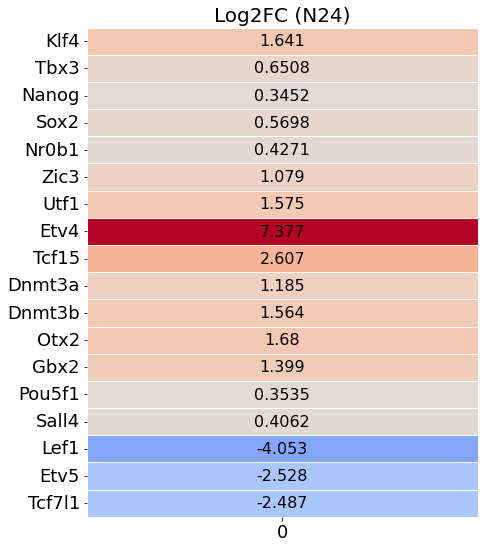

In [55]:
plt.figure(figsize=(7,9))
sns.heatmap(np.array(logFC_KO.iloc[:,:1]), annot=True, fmt="g", 
            yticklabels=logFC_KO.index, 
           cmap="coolwarm", cbar=False, center=0, linewidth=.5, annot_kws={"size":16, 'color':'black'})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Log2FC (N24)", fontsize=20)
plt.show()

In [70]:
df_KO_2 = pd.read_excel(path_data+'Kalkan_Data/tripleKO2.xlsx', index_col=0, header=0, sheet_name=0)
# select only the genes of our dataset
df_KO_2=df_KO_2[df_KO_2.index.isin(genes_order)].reindex(genes_order)

In [72]:
# select only the columns that contains "log2FC" in the name
df_KO_2 = df_KO_2.filter(regex='tKO')

df_KO_2

,log2FC [ETR-tKO.N-p5/Control.2i-p5],padj [ETR-tKO.N-p5/Control.2i-p5],ETR-tKO.N-p5.13,ETR-tKO.N-p5.14,ETR-tKO.N-p5.15
names,,,,,
Klf4,1.64100,6.886000e-32,28.8,38.3,36.7
Klf2,-0.05539,9.036000e-01,40.5,36.8,38.8
Esrrb,0.12400,4.155000e-01,83.2,114.6,105.4
Tfcp2l1,-0.06550,7.697000e-01,52.3,80.0,74.3
Tbx3,0.65080,3.946000e-04,13.3,21.9,21.0
Stat3,0.21600,1.670000e-01,3.2,4.2,4.1
Nanog,0.34520,1.527000e-03,356.0,377.6,371.2
Sox2,0.56980,5.429000e-06,168.1,190.2,190.8
Nr0b1,0.42710,4.572000e-03,28.3,40.9,37.4


In [73]:
df_KO_2_sel = df_KO_2.iloc[:,:2]
df_KO_2_sel

,log2FC [ETR-tKO.N-p5/Control.2i-p5],padj [ETR-tKO.N-p5/Control.2i-p5]
names,,
Klf4,1.64100,6.886000e-32
Klf2,-0.05539,9.036000e-01
Esrrb,0.12400,4.155000e-01
Tfcp2l1,-0.06550,7.697000e-01
Tbx3,0.65080,3.946000e-04
Stat3,0.21600,1.670000e-01
Nanog,0.34520,1.527000e-03
Sox2,0.56980,5.429000e-06
Nr0b1,0.42710,4.572000e-03


In [77]:
# remove rows with all nan values
df_KO_2_sel = df_KO_2_sel.dropna(how='all')

# check that the p-val is < 0.05
if (df_KO_2_sel['padj [ETR-tKO.N-p5/Control.2i-p5]'] >0.05).any():
    print("There are p-values > 0.05")
    # find the genes with p-val > 0.05
    idx_pval = df_KO_2_sel['padj [ETR-tKO.N-p5/Control.2i-p5]'] >0.05
    
# select only rows with p-val < 0.05
df_KO_2_sel = df_KO_2_sel[~idx_pval]

There are p-values > 0.05


In [83]:
df_KO_2_sel

,log2FC [ETR-tKO.N-p5/Control.2i-p5],padj [ETR-tKO.N-p5/Control.2i-p5]
names,,
Klf4,1.6410,6.886000e-32
Tbx3,0.6508,3.946000e-04
Nanog,0.3452,1.527000e-03
Sox2,0.5698,5.429000e-06
Nr0b1,0.4271,4.572000e-03
Zic3,1.0790,3.808000e-21
Utf1,1.5750,9.271000e-18
Etv4,7.3770,1.033000e-293
Tcf15,2.6070,4.556000e-41


In [82]:
logFC_KO_onlyData = df_KO_2_sel.iloc[:,0].astype(float)

save_data = True
if save_data:
    logFC_KO_onlyData.to_csv(path_data+r'Kalkan_Data/df_tripleKO.csv',  sep=',', mode='w')